In [1]:
%load_ext autoreload
%autoreload complete

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib_inline.backend_inline import set_matplotlib_formats
from tqdm.notebook import tqdm

from src.cache import cache

set_matplotlib_formats("svg")

In [2]:
from src.features.aggregation import all_regions

# get a random date where occ_protest is 1 in a random region
dfs = all_regions(ignore_group=True, protest_source="acled")
region = np.random.randint(0, len(dfs))
region_name, df_w = dfs[region]
date_ = df_w[df_w.occ_protest == 1].sample(1).index[0]

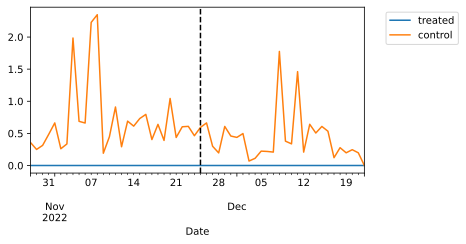

In [3]:
from src.features.aggregation import all_regions
from src.models.synthetic_control import synthetic_control_single

dfs = all_regions(ignore_group=True, ignore_medium=True, positive_queries=True)
y, y_c = synthetic_control_single(region_name, date_, dfs=dfs)
fig, ax = plt.subplots(figsize=(6, 3))

y["media_online_protest"].plot(ax=ax, label="treated")
y_c["media_online_protest"].plot(ax=ax, label="control")
ax.set_xlabel("Date")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
ax.axvline(date_, color="black", linestyle="--")
plt.show()

In [7]:
from src.models.synthetic_control import compute_synthetic_controls

y, y_c = compute_synthetic_controls(scale="demean", ignore_medium=True, n_jobs=4)

  0%|          | 0/861 [00:00<?, ?it/s]

No control regions for Bayern on 2021-03-19 00:00:00
No control regions for Berlin on 2021-03-19 00:00:00
No control regions for Brandenburg on 2021-03-19 00:00:00
No control regions for Hamburg on 2021-03-19 00:00:00
No control regions for Hessen on 2021-03-19 00:00:00
No control regions for Niedersachsen on 2021-03-19 00:00:00
No control regions for Nordrhein-Westfalen on 2021-03-19 00:00:00
No control regions for Rheinland-Pfalz on 2021-03-19 00:00:00
No control regions for Saarland on 2021-03-19 00:00:00
No control regions for Sachsen on 2021-03-19 00:00:00
No control regions for Sachsen-Anhalt on 2021-03-19 00:00:00
No control regions for Schleswig-Holstein on 2021-03-19 00:00:00
No control regions for Thüringen on 2021-03-19 00:00:00


In [8]:
ys, y_cs = dict(), dict()
for outcome in y[0].columns:
    ys[outcome] = pd.concat([df[outcome] for df in y], axis=1)
    y_cs[outcome] = pd.concat([df[outcome] for df in y_c], axis=1)
ys["media_combined_not_protest"] = pd.DataFrame(
    ys["media_combined_all"].values - ys["media_combined_protest"].values,
    columns=ys["media_combined_all"].columns,
    index=ys["media_combined_all"].index,
)
y_cs["media_combined_not_protest"] = pd.DataFrame(
    y_cs["media_combined_all"].values - y_cs["media_combined_protest"].values,
    columns=y_cs["media_combined_all"].columns,
    index=y_cs["media_combined_all"].index,
)

[autoreload of src.features.aggregation failed: Traceback (most recent call last):
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 274, in check
    superreload(m, reload, self.old_objects, self.shell)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/david/Repositories/protest-impact/

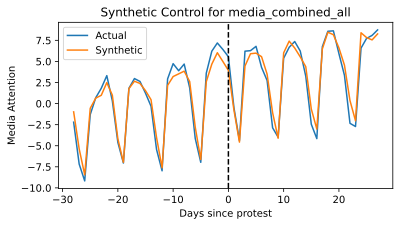

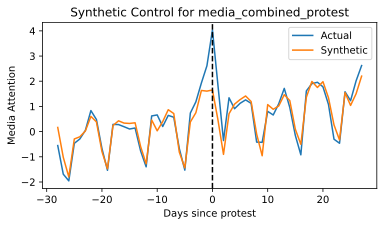

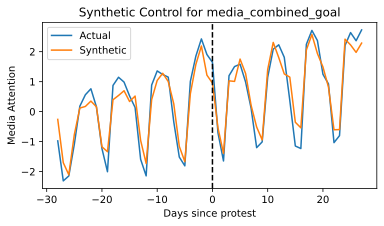

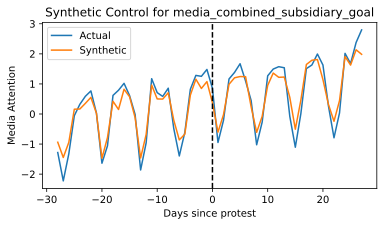

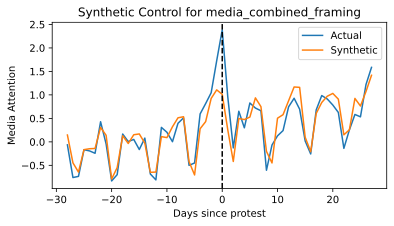

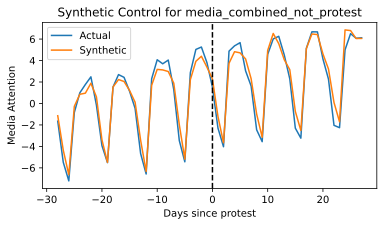

In [9]:
import matplotlib.pyplot as plt

for (name, y), (name_c, y_c) in zip(ys.items(), y_cs.items()):
    if "online" in name:
        continue
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.plot(y.index, y.mean(axis=1), label="Actual")
    ax.plot(y_c.index, y_c.mean(axis=1), label="Synthetic")
    # ax.plot(y.index, y.mean(axis=1) - y_c.mean(axis=1), label="Diff")
    ax.legend()
    ax.set_title(f"Synthetic Control for {name}")
    ax.set_ylabel("Media Attention")
    ax.set_xlabel("Days since protest")
    ax.axvline(0, color="black", linestyle="--")
    plt.show()